In [3]:
# !pip install py-openaq
# !pip install folium
# !pip install shapely
# !pip install geopandas

import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [1]:
# Importing data on Cities

import openaq

api = openaq.OpenAQ()

status, resp = api.cities()
# print(resp)

In [120]:
res = api.parameters(df=True)
res.head(100)

id   name                                        description  \
0       1   pm10  Particulate matter less than 10 micrometers in...   
1       2   pm25  Particulate matter less than 2.5 micrometers i...   
2       3     o3                           Ozone mass concentration   
3       4     co                 Carbon Monoxide mass concentration   
4       5    no2                Nitrogen Dioxide mass concentration   
5       6    so2                  Sulfur Dioxide mass concentration   
6       7    no2                     Nitrogen Dioxide concentration   
7       8     co                      Carbon Monoxide concentration   
8       9    so2                       Sulfur Dioxide concentration   
9      10     o3                                Ozone concentration   
10     11     bc                    Black Carbon mass concentration   
11     19    pm1  Particulate matter less than 1 micrometer in d...   
12     21    co2                       Carbon Dioxide concentration   
13     27    nox                 Nitrogen Oxides mass concentration   
14     28    ch4                              Methane concentration   
15     33    ufp            Ultrafine Particles count concentration   
16     35     no                    Nitrogen Monoxide concentration   
17    126  um010                                          PM1 count   
18    130  um025                                        PM2.5 count   
19    135  um100                                         PM10 count   
20  19840    nox                      Nitrogen Oxides concentration   
21  19843     no               Nitrogen Monoxide mass concentration   

    preferredUnit  
0           µg/m³  
1           µg/m³  
2           µg/m³  
3           µg/m³  
4           µg/m³  
5           µg/m³  
6             ppm  
7             ppm  
8             ppm  
9             ppm  
10          µg/m³  
11          µg/m³  
12            ppm  
13          µg/m³  
14            ppm  
15  particles/cm³  
16            ppm  
17  particles/cm³  
18  particles/cm³  
19  particles/cm³  
20            ppm  
21          µg/m³

In [38]:
res = api.measurements(parameter='pm10', limit=1000, df=True)
# res.head(10000)
res = res.groupby(['location']).first()
res.head(1000)

c:\python39\lib\site-packages\openaq\decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


parameter    value  \
location                                                                
 Gołdap, ul. Jaćwieska                                  pm10  40.6703   
 Olsztyn, ul. Puszkina                                  pm10  27.1867   
60th Anniversary Queen Sirikit Public Park, Loei        pm10  61.0000   
72nd Anniversary King Bhumibol Public Park, Utt...      pm10  50.0000   
7E Deming Airport                                       pm10   7.0000   
...                                                      ...      ...   
Niepołomice, ul. 3 Maja                                 pm10  19.8664   
Niland - English Roa                                    pm10  17.0000   
Nipomo Mesa CDF                                         pm10  18.0000   
Nipomo RP                                               pm10  22.0000   
Nisko, ul. Szklarniowa                                  pm10  35.2484   

                                                                      unit  \
location                                                                     
 Gołdap, ul. Jaćwieska                              b'\xc2\xb5g/m\xc2\xb3'   
 Olsztyn, ul. Puszkina                              b'\xc2\xb5g/m\xc2\xb3'   
60th Anniversary Queen Sirikit Public Park, Loei    b'\xc2\xb5g/m\xc2\xb3'   
72nd Anniversary King Bhumibol Public Park, Utt...  b'\xc2\xb5g/m\xc2\xb3'   
7E Deming Airport                                   b'\xc2\xb5g/m\xc2\xb3'   
...                                                                    ...   
Niepołomice, ul. 3 Maja                             b'\xc2\xb5g/m\xc2\xb3'   
Niland - English Roa                                b'\xc2\xb5g/m\xc2\xb3'   
Nipomo Mesa CDF                                     b'\xc2\xb5g/m\xc2\xb3'   
Nipomo RP                                           b'\xc2\xb5g/m\xc2\xb3'   
Nisko, ul. Szklarniowa                              b'\xc2\xb5g/m\xc2\xb3'   

                                                   country  \
location                                                     
 Gołdap, ul. Jaćwieska                                  PL   
 Olsztyn, ul. Puszkina                                  PL   
60th Anniversary Queen Sirikit Public Park, Loei        TH   
72nd Anniversary King Bhumibol Public Park, Utt...      TH   
7E Deming Airport                                       US   
...                                                    ...   
Niepołomice, ul. 3 Maja                                 PL   
Niland - English Roa                                    US   
Nipomo Mesa CDF                                         US   
Nipomo RP                                               US   
Nisko, ul. Szklarniowa                                  PL   

                                                                           city  \
location                                                                          
 Gołdap, ul. Jaćwieska                                                   Gołdap   
 Olsztyn, ul. Puszkina                                                  Olsztyn   
60th Anniversary Queen Sirikit Public Park, Loei                           Loei   
72nd Anniversary King Bhumibol Public Park, Utt...                    Uttaradit   
7E Deming Airport                                                        Deming   
...                                                                         ...   
Niepołomice, ul. 3 Maja                                             Niepołomice   
Niland - English Roa                                                  El Centro   
Nipomo Mesa CDF                                                 SAN LUIS OBISPO   
Nipomo RP                                           San Luis Obispo-Paso Robles   
Nisko, ul. Szklarniowa                                                    Nisko   

                                                                    date.utc  \
location                                                                       
 Gołdap, ul. Jaćwieska                 

In [6]:
# openaq用法：http://dhhagan.github.io/py-openaq/tutorial/api.html

# 结果生成的图：https://openaq.org/#/map?parameter=11

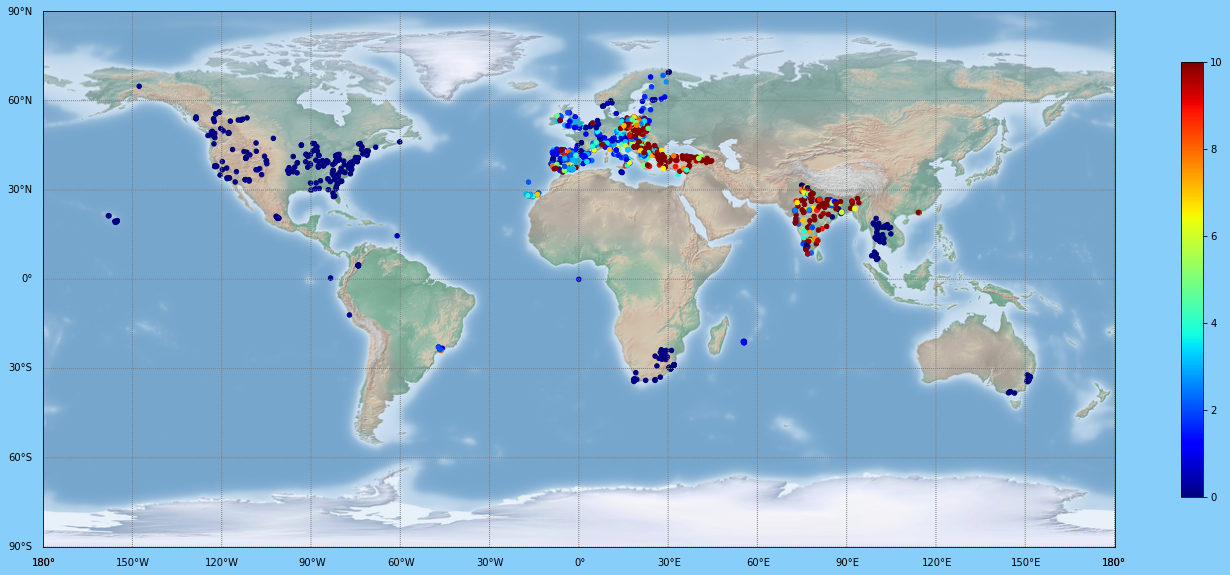

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

n = res.count()
x = res['coordinates.longitude']
y = res['coordinates.latitude']
v = res['value']

# https://www.cnblogs.com/qianblue/p/10783261.html
fig = plt.figure(figsize=(24, 16),facecolor='lightskyblue')

map = Basemap()
map.shadedrelief(scale=0.1)

map.drawparallels(circles=np.linspace(-90, 90, 7),
                  labels=[1, 0, 0, 0], color='gray')
map.drawmeridians(meridians=np.linspace(-180, 180, 13),
                  labels=[0, 0, 0, 1], color='gray')

map.scatter(x, y, s=20, c=v, norm=plt.Normalize(vmin=0, vmax=10), cmap=plt.cm.jet)
# Add colorbar
sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=10))
cbar = fig.colorbar(sm, shrink=0.5)

plt.show()

In [40]:
import openaq
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
def darwaq(p,minv,maxv,lim):
    res = api.measurements(parameter=p, limit=lim, df=True)
    res = res.groupby(['location']).first()
    n = res.count()
    x = res['coordinates.longitude']
    y = res['coordinates.latitude']
    v = res['value']

    # https://www.cnblogs.com/qianblue/p/10783261.html
    fig = plt.figure(figsize=(24, 16),facecolor='lightskyblue')

    map = Basemap()
    map.shadedrelief(scale=0.1)
    
    map.drawparallels(circles=np.linspace(-90, 90, 7),
                  labels=[1, 0, 0, 0], color='gray')
    map.drawmeridians(meridians=np.linspace(-180, 180, 13),
                  labels=[0, 0, 0, 1], color='gray')

    map.scatter(x, y, s=20, c=v, norm=plt.Normalize(vmin=minv, vmax=maxv), cmap=plt.cm.jet)

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=minv, vmax=maxv))
    cbar = fig.colorbar(sm, shrink=0.5)

    plt.show()
    

c:\python39\lib\site-packages\openaq\decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


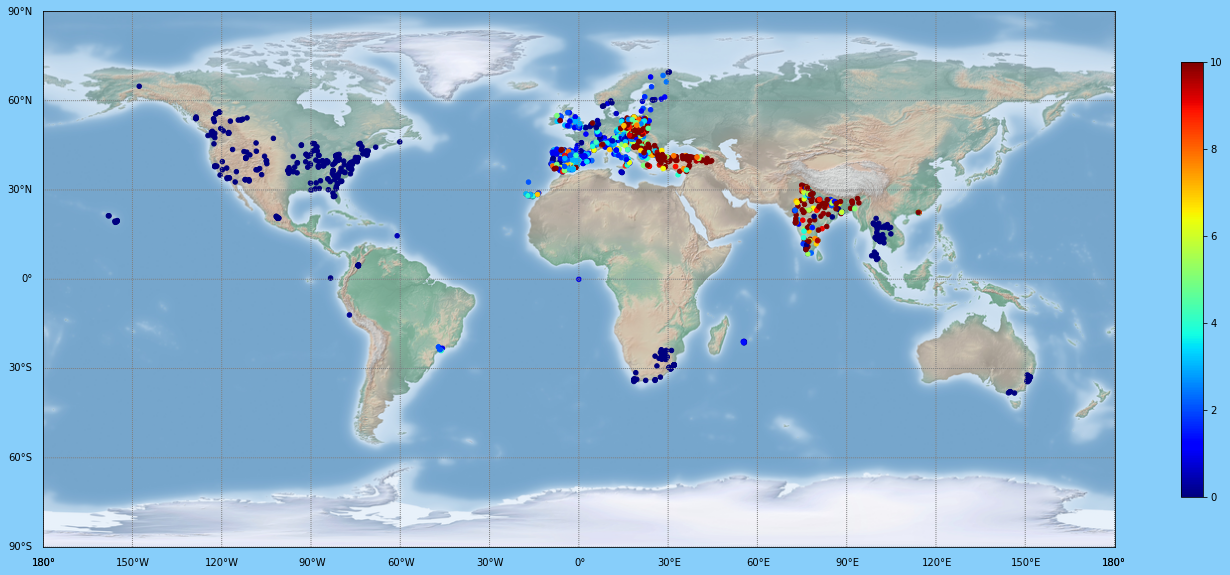

In [41]:
darwaq('so2',0,10,10000)

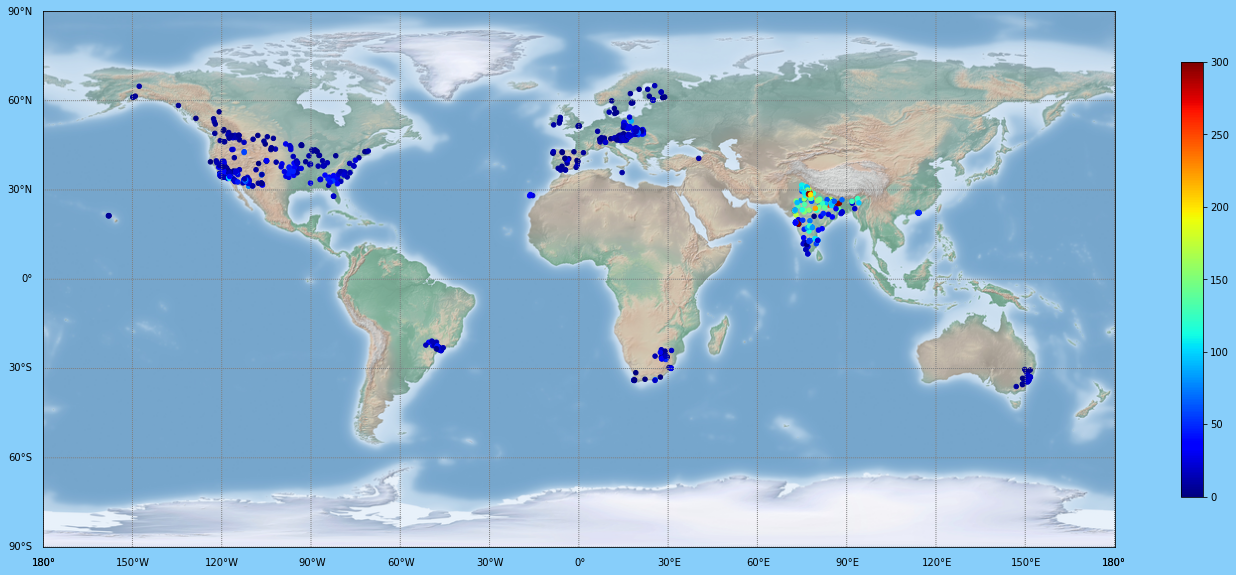

In [42]:
darwaq('pm10',0,300,1000)

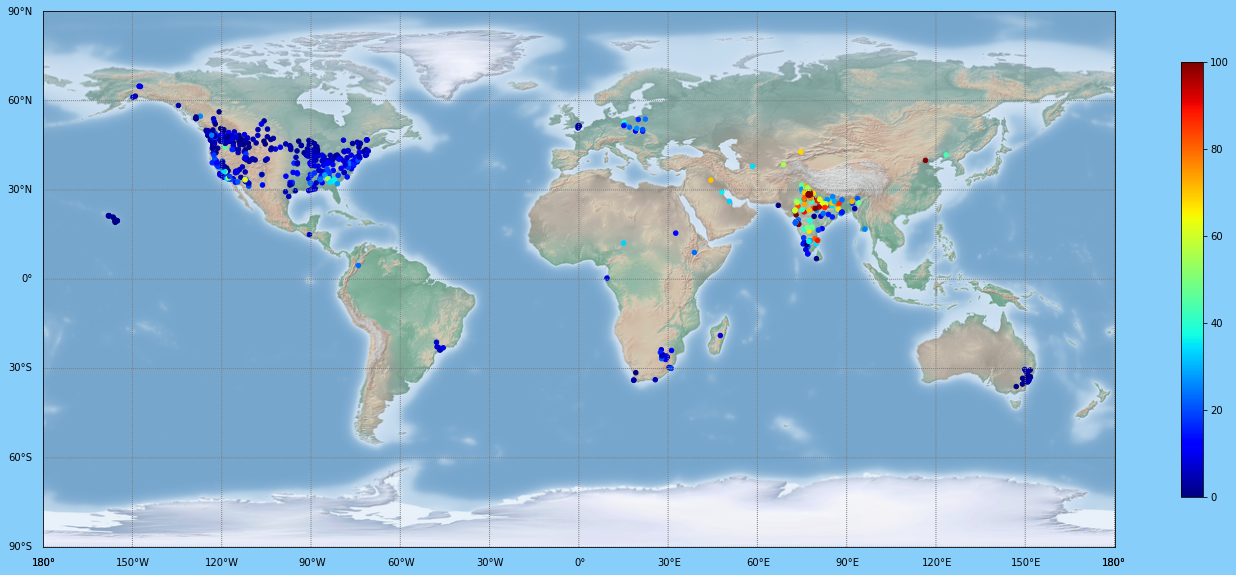

In [43]:
darwaq('pm25',0,100,1000)

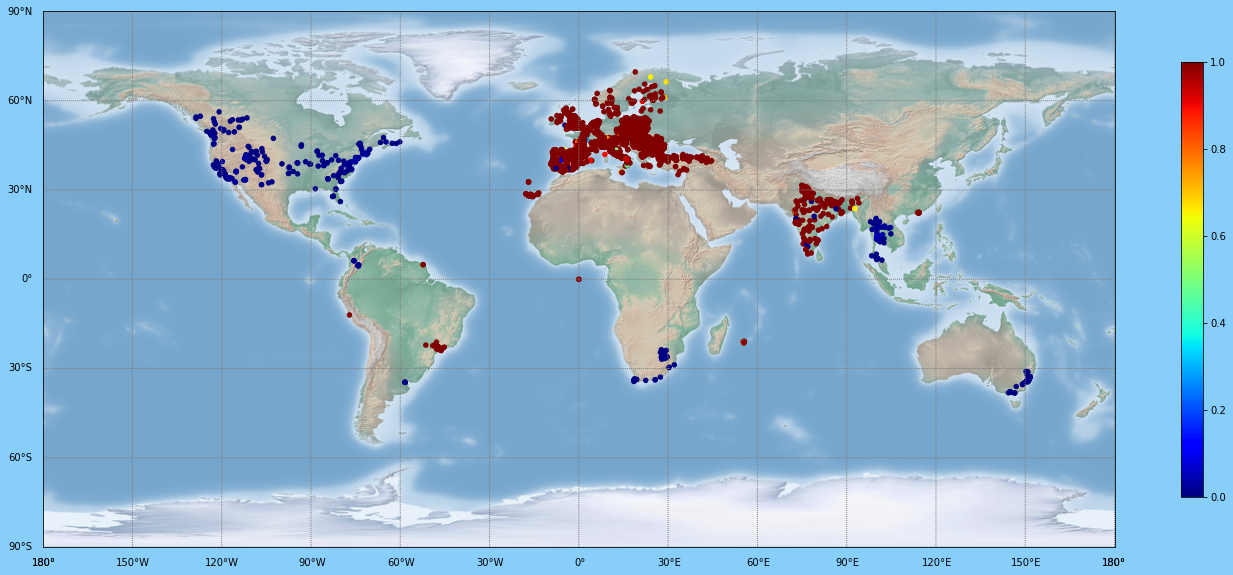

In [44]:
darwaq('no2',0,1,10000)

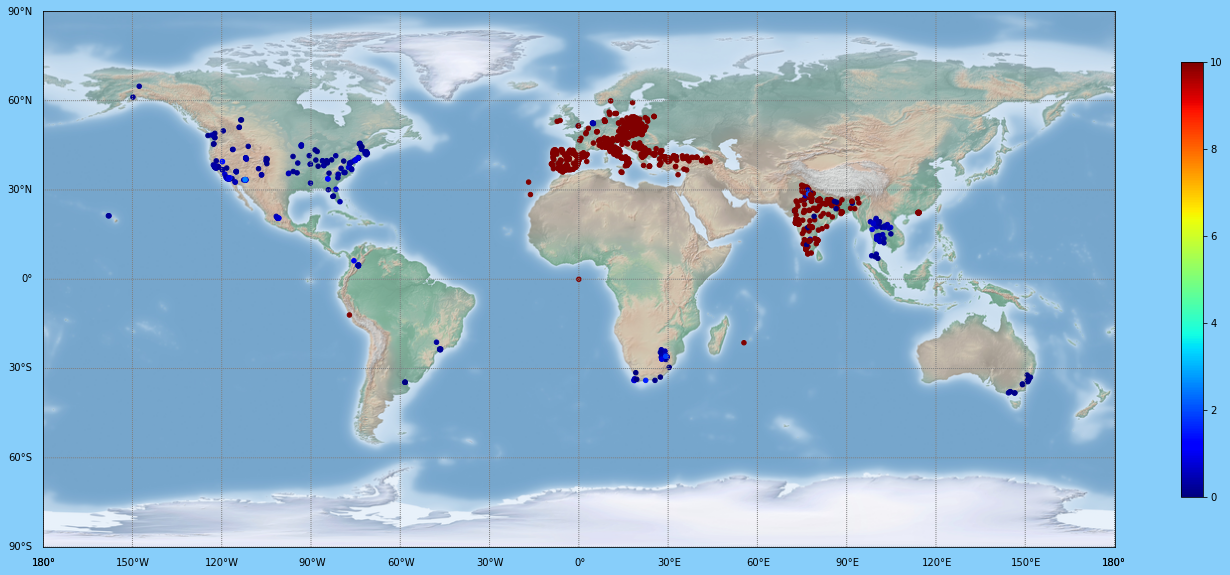

In [45]:
darwaq('co',0,10,10000)

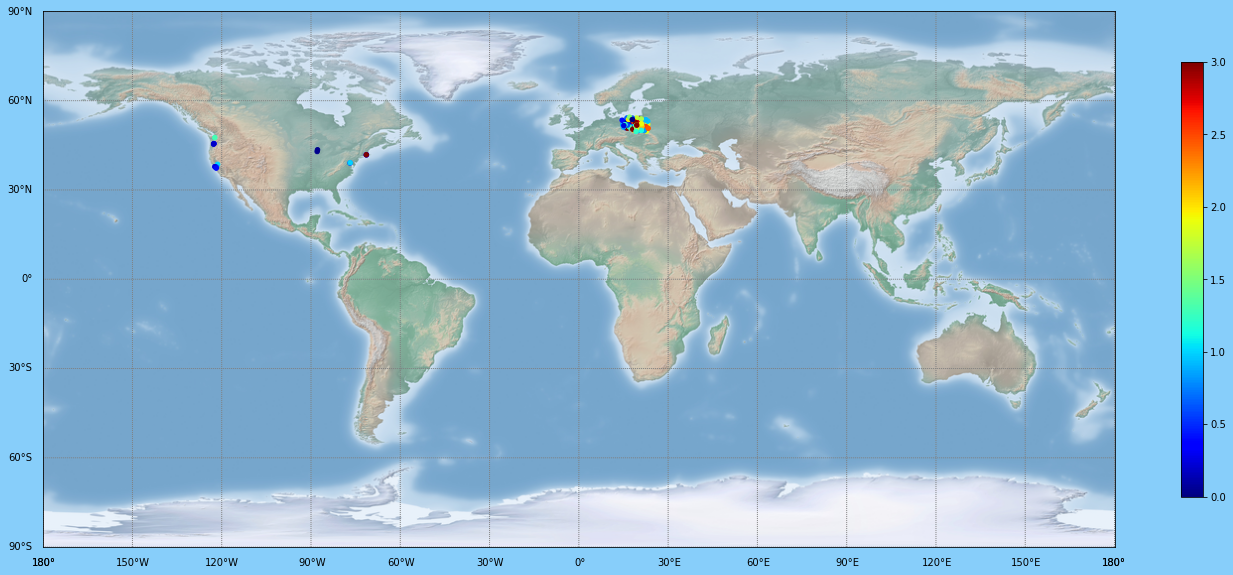

In [46]:
darwaq('bc',0,3,10000)

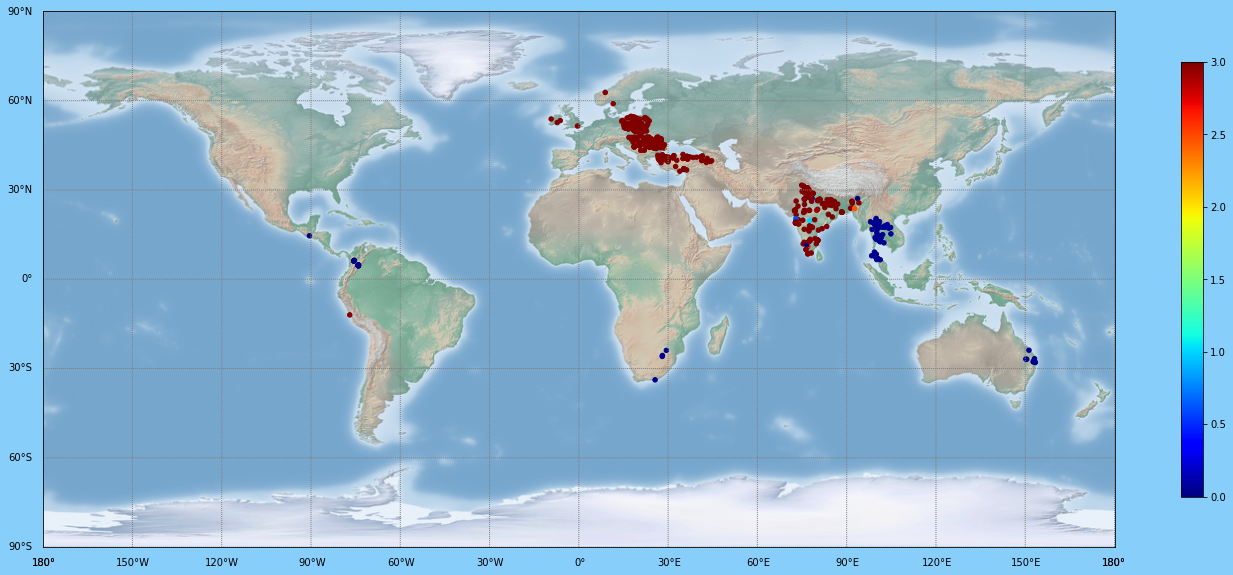

In [49]:
darwaq('o3',0,3,500)